In [197]:
# import all necessary packages
import pandas as pd; import numpy as np
import matplotlib.pyplot as plt
import xarray as xr; from netCDF4 import Dataset
import datetime

In [361]:
# load ERA5 data
file_new = 'summers.nc'
DS_variables =xr.open_dataset(file_new)

u10 = DS_variables['u10'] # u-component of velocity at 10 m height
v10 = DS_variables['v10'] # v-component of velocity at 10 m height
# t2m = DS_variables['t2m'] # u-component of velocity at 10 m height
tp = DS_variables['tp'] # total precipitation
sst = DS_variables['sst'] # sea surface temperature

In [528]:
DS_variables

<xarray.Dataset>
Dimensions:    (longitude: 161, latitude: 101, time: 1012)
Coordinates:
  * longitude  (longitude) float32 -160.0 -159.8 -159.5 ... -120.5 -120.2 -120.0
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... 35.5 35.25 35.0
  * time       (time) datetime64[ns] 2010-06-01 2010-06-02 ... 2020-08-31
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    sst        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-03-31 01:06:26 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

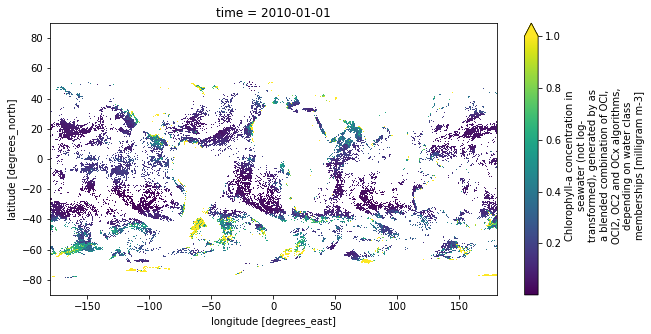

In [362]:
# load sample chlorophyll-a data. Note that this is for one day.
file_new = 'ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20100101-fv5.0.1.nc'
DS_chloro =xr.open_dataset(file_new)
chlor_a = DS_chloro['chlor_a']
chlor_a[0,:,:].plot(vmax=1)

In [363]:
# load MJO indices
MJO_phase = pd.read_csv('mjo_phase_data.csv',index_col=False)
MJO_phase.drop(MJO_phase.columns[[ 5, 6, 7, 8,9,10,11,12]], axis=1, inplace=True)
# pre-processing MJO indices
MJO_phase_renamed = MJO_phase.rename(columns={0: "year", 1: "month", 2: "day", 3:"amplitude"})
MJO_phase_timeframe = MJO_phase_renamed[(MJO_phase_renamed['year'] >= 2010) & (MJO_phase_renamed['year'] <= 2020)].reset_index() 
# we will look only at summer months
just_summer_times = MJO_phase_timeframe[(MJO_phase_timeframe['month'] >= 6) & (MJO_phase_timeframe['month'] <= 8)].reset_index() 
just_summer_times

,level_0,index,year,month,day,phase,amplitude
0,151,13149,2010,6,1,1,1.435723
1,152,13150,2010,6,2,1,1.051954
2,153,13151,2010,6,3,1,0.898930
3,154,13152,2010,6,4,1,0.907644
4,155,13153,2010,6,5,2,0.880114
...,...,...,...,...,...,...,...
1007,3891,16889,2020,8,27,1,2.380026
1008,3892,16890,2020,8,28,2,1.912718
1009,3893,16891,2020,8,29,2,1.670691
1010,3894,16892,2020,8,30,2,1.570872


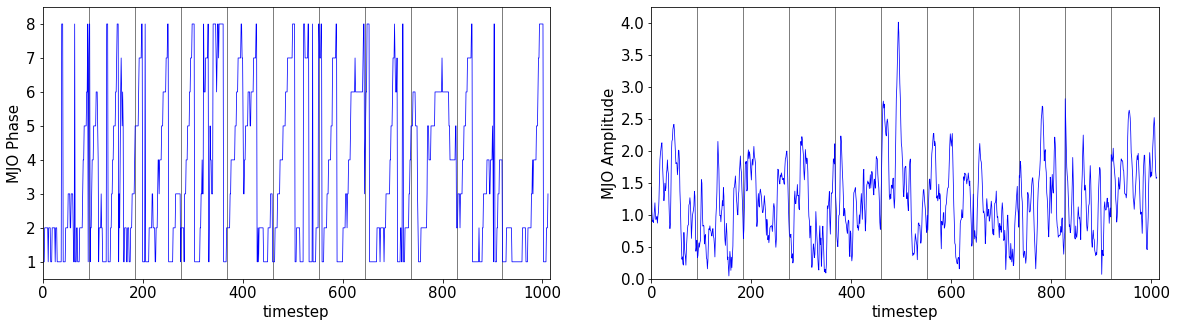

In [293]:
plt.rcParams["figure.figsize"] = (20,5)

plt.subplot(1, 2, 1)
# there has to be an easier way to make these lines
plt.axvline(x=92, c='k',linewidth=0.5); plt.axvline(x=92*2, c='k',linewidth=0.5); plt.axvline(x=92*3, c='k',linewidth=0.5)
plt.axvline(x=92*4, c='k',linewidth=0.5); plt.axvline(x=92*5, c='k',linewidth=0.5); plt.axvline(x=92*6, c='k',linewidth=0.5)
plt.axvline(x=92*7, c='k',linewidth=0.5); plt.axvline(x=92*8, c='k',linewidth=0.5); plt.axvline(x=92*9, c='k',linewidth=0.5)
plt.axvline(x=92*10, c='k',linewidth=0.5)
plt.plot(np.arange(len(just_summer_times)), data1, color='blue',linewidth=0.75)
plt.xlim(0,1015); plt.ylim(0.5,8.5)
plt.xlabel('timestep',fontsize=15); plt.ylabel('MJO Phase', fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)

plt.subplot(1, 2, 2)
plt.axvline(x=92, c='k',linewidth=0.5); plt.axvline(x=92*2, c='k',linewidth=0.5); plt.axvline(x=92*3, c='k',linewidth=0.5)
plt.axvline(x=92*4, c='k',linewidth=0.5); plt.axvline(x=92*5, c='k',linewidth=0.5); plt.axvline(x=92*6, c='k',linewidth=0.5)
plt.axvline(x=92*7, c='k',linewidth=0.5); plt.axvline(x=92*8, c='k',linewidth=0.5); plt.axvline(x=92*9, c='k',linewidth=0.5)
plt.axvline(x=92*10, c='k',linewidth=0.5)
plt.plot(np.arange(len(just_summer_times)), data2, color='blue',linewidth=0.75)
plt.xlim(0,1015); plt.ylim(0,4.25)
plt.xlabel('timestep',fontsize=15); plt.ylabel('MJO Amplitude', fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
plt.show()

In [294]:
MJO_timeframe['datetime'] = MJO_timeframe[MJO_timeframe.columns[1:4]].apply(lambda x: '-'.join(x.dropna().astype(str)),axis=1)
MJO_timeframe['datetime'] = pd.to_datetime(MJO_timeframe['datetime'], format='%Y-%m-%d')    

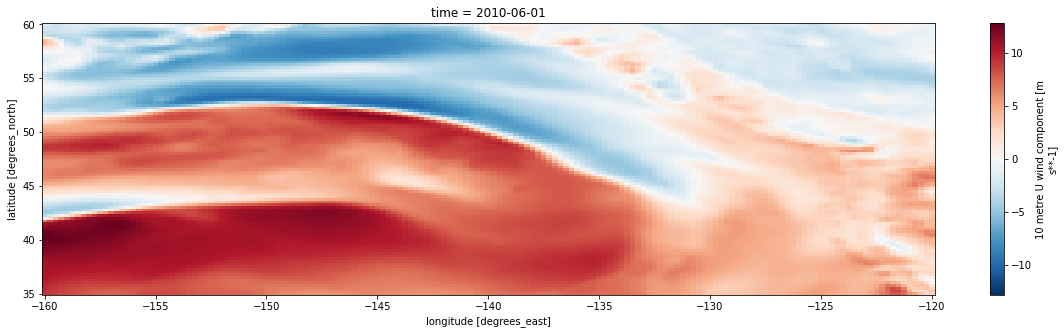

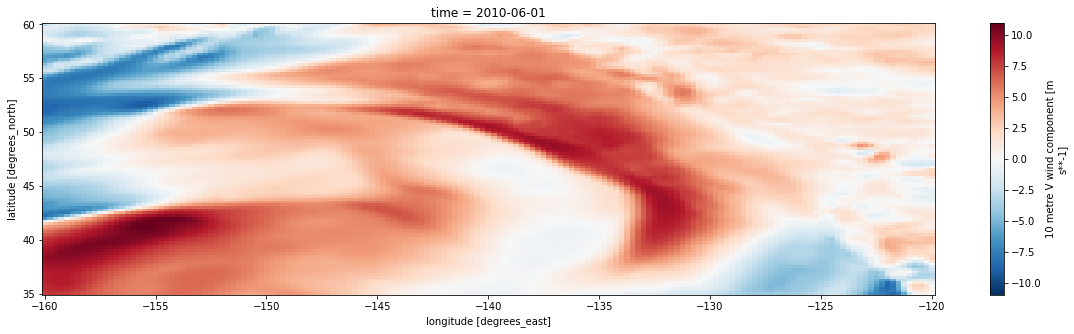

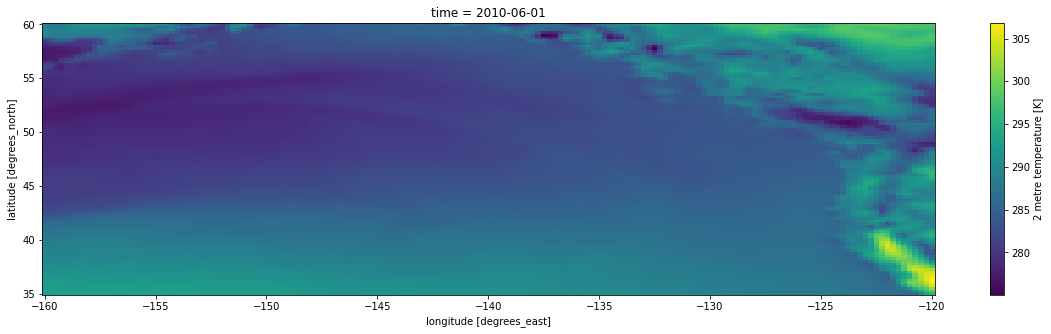

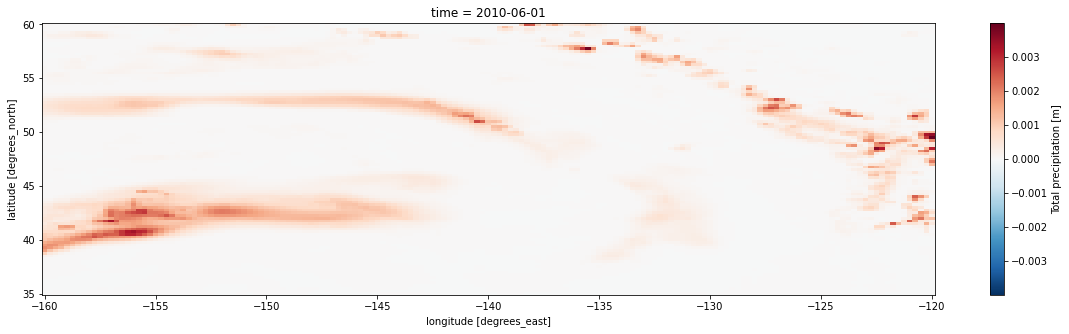

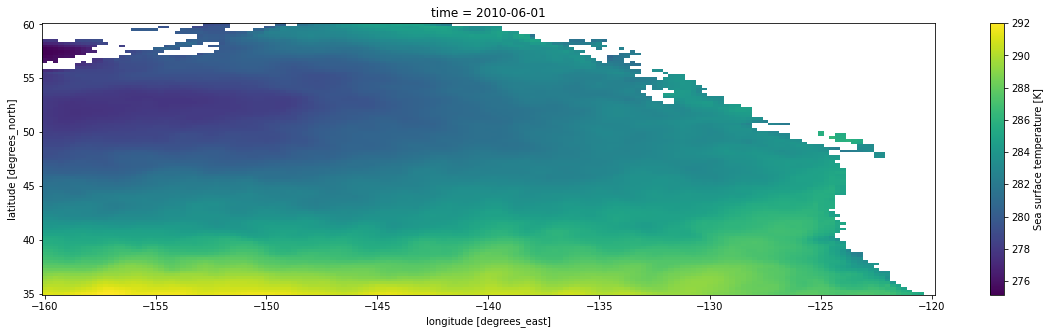

In [297]:
u10[0,:,:].plot()
plt.show()
v10[0,:,:].plot()
plt.show()
t2m[0,:,:].plot()
plt.show()
tp[0,:,:].plot()
plt.show()
sst[0,:,:].plot()
plt.show()

In [383]:
### computing the anomalies

climatology_u10 = u10.groupby('time.month').mean('time')
anomalies_u10 = u10.groupby('time.month') - climatology_u10

climatology_v10 = v10.groupby('time.month').mean('time')
anomalies_v10 = v10.groupby('time.month') - climatology_v10

climatology_tp = tp.groupby('time.month').mean('time')
anomalies_tp = tp.groupby('time.month') - climatology_tp

climatology_sst = sst.groupby('time.month').mean('time')
anomalies_sst = sst.groupby('time.month') - climatology_sst

In [385]:
means_tp = []; means_u10 = []; means_v10 = []; means_t2m = []; means_sst = []
max_tp = []; max_u10 = []; max_v10 = []; max_t2m = []; max_sst = []
min_tp = []; min_u10 = []; min_v10 = []; min_t2m = []; min_sst = []

for time in range(len(u10)):
#     means_tp.append(np.nanmean(tp[time,:,:]))
#     means_u10.append(np.nanmean(u10[time,:,:]))
#     means_v10.append(np.nanmean(v10[time,:,:]))
#     means_t2m.append(np.nanmean(t2m[time,:,:]))
#     means_sst.append(np.nanmean(sst[time,:,:]))
    
#     max_tp.append(np.nanmax(tp[time,:,:]))
#     max_u10.append(np.nanmax(u10[time,:,:]))
#     max_v10.append(np.nanmax(v10[time,:,:]))
#     max_t2m.append(np.nanmax(t2m[time,:,:]))
#     max_sst.append(np.nanmax(sst[time,:,:]))
    
#     min_tp.append(np.nanmin(tp[time,:,:]))
#     min_u10.append(np.nanmin(u10[time,:,:]))
#     min_v10.append(np.nanmin(v10[time,:,:]))
#     min_t2m.append(np.nanmin(t2m[time,:,:]))
#     min_sst.append(np.nanmin(sst[time,:,:]))
    
    means_tp.append(np.nanmean(anomalies_tp[time,:,:]))
    means_u10.append(np.nanmean(anomalies_u10[time,:,:]))
    means_v10.append(np.nanmean(anomalies_v10[time,:,:]))
    # means_t2m.append(np.nanmean(anomalies_t2m[time,:,:]))
    means_sst.append(np.nanmean(anomalies_sst[time,:,:]))
    
    max_tp.append(np.nanmax(anomalies_tp[time,:,:]))
    max_u10.append(np.nanmax(anomalies_u10[time,:,:]))
    max_v10.append(np.nanmax(anomalies_v10[time,:,:]))
    # max_t2m.append(np.nanmax(anomalies_t2m[time,:,:]))
    max_sst.append(np.nanmax(anomalies_sst[time,:,:]))
    
    min_tp.append(np.nanmin(anomalies_tp[time,:,:]))
    min_u10.append(np.nanmin(anomalies_u10[time,:,:]))
    min_v10.append(np.nanmin(anomalies_v10[time,:,:]))
    # min_t2m.append(np.nanmin(anomalies_t2m[time,:,:]))
    min_sst.append(np.nanmin(anomalies_sst[time,:,:]))

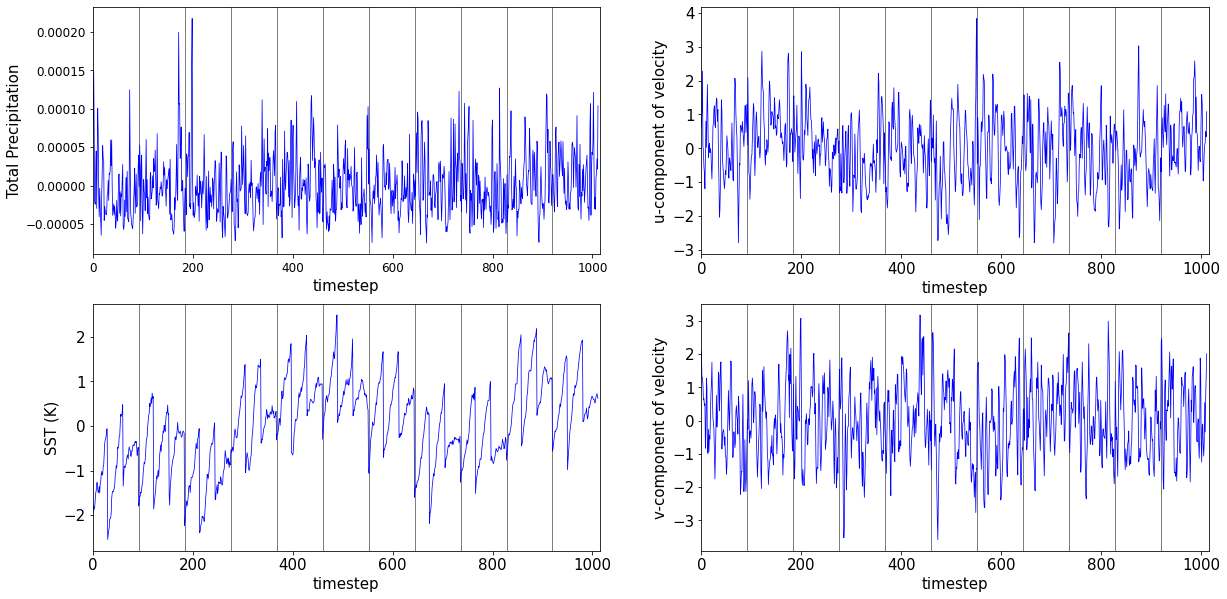

In [388]:
plt.rcParams["figure.figsize"] = (20,10)

plt.subplot(2, 2, 1)
# there has to be an easier way to make these lines
plt.axvline(x=92, c='k',linewidth=0.5); plt.axvline(x=92*2, c='k',linewidth=0.5); plt.axvline(x=92*3, c='k',linewidth=0.5)
plt.axvline(x=92*4, c='k',linewidth=0.5); plt.axvline(x=92*5, c='k',linewidth=0.5); plt.axvline(x=92*6, c='k',linewidth=0.5)
plt.axvline(x=92*7, c='k',linewidth=0.5); plt.axvline(x=92*8, c='k',linewidth=0.5); plt.axvline(x=92*9, c='k',linewidth=0.5)
plt.axvline(x=92*10, c='k',linewidth=0.5)
plt.plot(np.arange(len(means_tp)),means_tp, color='blue',linewidth=0.75)
plt.xlim(0,1015)#; plt.ylim(0,0.00035)
plt.xlabel('timestep',fontsize=15); plt.ylabel('Total Precipitation', fontsize=15)
plt.yticks(fontsize=12, rotation=0); plt.xticks(fontsize=12, rotation=0)

plt.subplot(2, 2, 2)
plt.axvline(x=92, c='k',linewidth=0.5); plt.axvline(x=92*2, c='k',linewidth=0.5); plt.axvline(x=92*3, c='k',linewidth=0.5)
plt.axvline(x=92*4, c='k',linewidth=0.5); plt.axvline(x=92*5, c='k',linewidth=0.5); plt.axvline(x=92*6, c='k',linewidth=0.5)
plt.axvline(x=92*7, c='k',linewidth=0.5); plt.axvline(x=92*8, c='k',linewidth=0.5); plt.axvline(x=92*9, c='k',linewidth=0.5)
plt.axvline(x=92*10, c='k',linewidth=0.5)
plt.plot(np.arange(len(means_u10)), means_u10, color='blue',linewidth=0.75)
plt.xlim(0,1015)#; plt.ylim(-1,6)
plt.xlabel('timestep',fontsize=15); plt.ylabel('u-component of velocity', fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
plt.xlim(0,1015)#; plt.ylim(-1,6)

plt.subplot(2, 2, 3)
plt.axvline(x=92, c='k',linewidth=0.5); plt.axvline(x=92*2, c='k',linewidth=0.5); plt.axvline(x=92*3, c='k',linewidth=0.5)
plt.axvline(x=92*4, c='k',linewidth=0.5); plt.axvline(x=92*5, c='k',linewidth=0.5); plt.axvline(x=92*6, c='k',linewidth=0.5)
plt.axvline(x=92*7, c='k',linewidth=0.5); plt.axvline(x=92*8, c='k',linewidth=0.5); plt.axvline(x=92*9, c='k',linewidth=0.5)
plt.axvline(x=92*10, c='k',linewidth=0.5)
plt.plot(np.arange(len(means_sst)), means_sst, color='blue',linewidth=0.75)
plt.xlim(0,1015)#; plt.ylim(283,293)
plt.xlabel('timestep',fontsize=15); plt.ylabel('SST (K)', fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)

plt.subplot(2, 2, 4)
plt.axvline(x=92, c='k',linewidth=0.5); plt.axvline(x=92*2, c='k',linewidth=0.5); plt.axvline(x=92*3, c='k',linewidth=0.5)
plt.axvline(x=92*4, c='k',linewidth=0.5); plt.axvline(x=92*5, c='k',linewidth=0.5); plt.axvline(x=92*6, c='k',linewidth=0.5)
plt.axvline(x=92*7, c='k',linewidth=0.5); plt.axvline(x=92*8, c='k',linewidth=0.5); plt.axvline(x=92*9, c='k',linewidth=0.5)
plt.axvline(x=92*10, c='k',linewidth=0.5)
plt.plot(np.arange(len(means_v10)), means_v10, color='blue',linewidth=0.75)
plt.xlim(0,1015)#; plt.ylim(-4,4)
plt.xlabel('timestep',fontsize=15); plt.ylabel('v-component of velocity', fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)

plt.show()

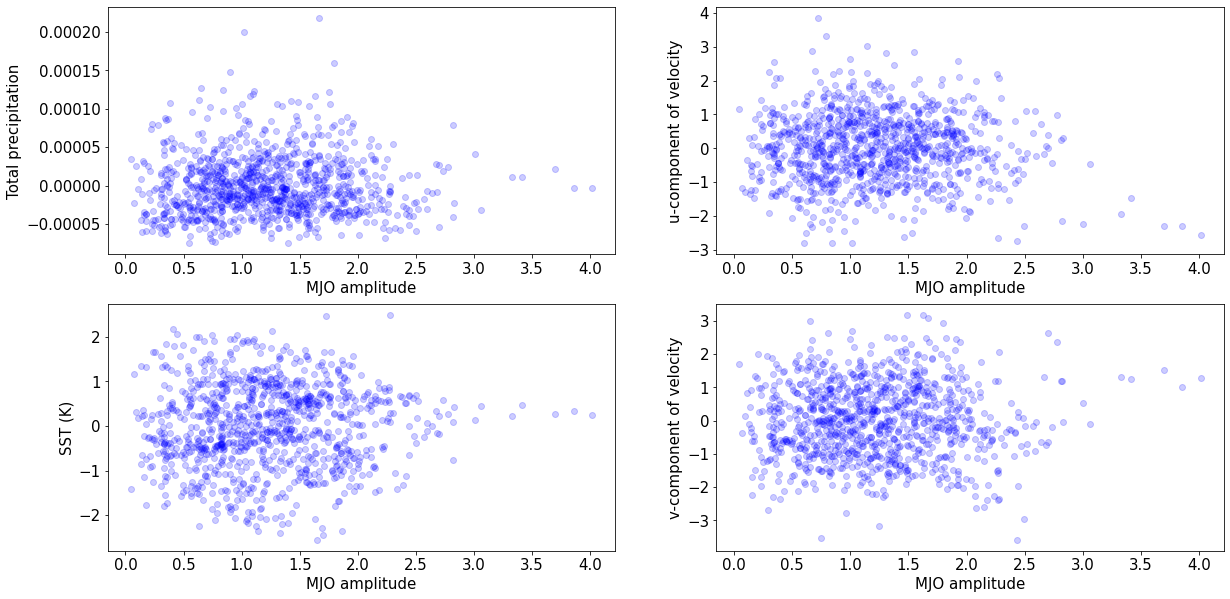

In [390]:
plt.rcParams["figure.figsize"] = (20,10)

plt.subplot(2, 2, 1)
plt.scatter(just_summer_times['amplitude'], means_tp, alpha=0.2, c='blue')
plt.xlabel('MJO amplitude',fontsize=15); plt.ylabel('Total precipitation',fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
#plt.ylim(0,0.00035)

plt.subplot(2, 2, 2)
plt.scatter(just_summer_times['amplitude'], means_u10, alpha=0.2, c='blue')
plt.xlabel('MJO amplitude',fontsize=15); plt.ylabel('u-component of velocity',fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
#plt.ylim(-1,6)

plt.subplot(2, 2, 4)
plt.scatter(just_summer_times['amplitude'], means_v10, alpha=0.2, c='blue')
plt.xlabel('MJO amplitude',fontsize=15); plt.ylabel('v-component of velocity',fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
#plt.ylim(-4,4)

plt.subplot(2, 2, 3)
plt.scatter(just_summer_times['amplitude'], means_sst, alpha=0.2, c='blue')
plt.xlabel('MJO amplitude',fontsize=15); plt.ylabel('SST (K)',fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
#plt.ylim(283,293)

plt.show()

In [391]:
from scipy.stats import pearsonr

corr, _ = pearsonr(just_summer_times['amplitude'], means_tp)
print('Pearsons correlation: %.3f' % corr)

corr, _ = pearsonr(just_summer_times['amplitude'], means_u10)
print('Pearsons correlation: %.3f' % corr)

corr, _ = pearsonr(just_summer_times['amplitude'], means_v10)
print('Pearsons correlation: %.3f' % corr)

corr, _ = pearsonr(just_summer_times['amplitude'], means_sst)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.018
Pearsons correlation: -0.045
Pearsons correlation: 0.016
Pearsons correlation: 0.044


In [392]:
corr, _ = pearsonr(just_summer_times['phase'], means_tp)
print('Pearsons correlation: %.3f' % corr)

corr, _ = pearsonr(just_summer_times['phase'], means_u10)
print('Pearsons correlation: %.3f' % corr)

corr, _ = pearsonr(just_summer_times['phase'], means_v10)
print('Pearsons correlation: %.3f' % corr)

corr, _ = pearsonr(just_summer_times['phase'], means_sst)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.012
Pearsons correlation: -0.066
Pearsons correlation: 0.013
Pearsons correlation: 0.109


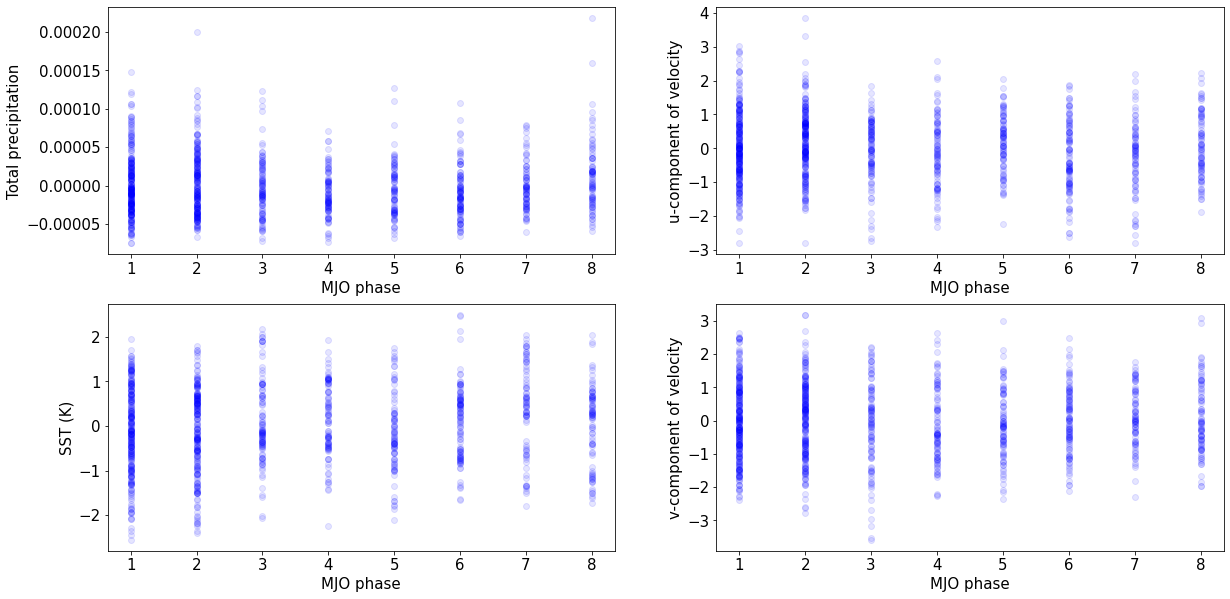

In [394]:
plt.rcParams["figure.figsize"] = (20,10)

plt.subplot(2, 2, 1)
plt.scatter(just_summer_times['phase'], means_tp, alpha=0.1, c='blue')
plt.xlabel('MJO phase',fontsize=15); plt.ylabel('Total precipitation',fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
#plt.ylim(0,0.00035)

plt.subplot(2, 2, 2)
plt.scatter(just_summer_times['phase'], means_u10, alpha=0.1, c='blue')
plt.xlabel('MJO phase',fontsize=15); plt.ylabel('u-component of velocity',fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
#plt.ylim(-1,6)

plt.subplot(2, 2, 4)
plt.scatter(just_summer_times['phase'], means_v10, alpha=0.1, c='blue')
plt.xlabel('MJO phase',fontsize=15); plt.ylabel('v-component of velocity',fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
#plt.ylim(-4,4)

plt.subplot(2, 2, 3)
plt.scatter(just_summer_times['phase'], means_sst, alpha=0.1, c='blue')
plt.xlabel('MJO phase',fontsize=15); plt.ylabel('SST (K)',fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
#plt.ylim(283,293)

plt.show()

In [395]:
phasegrouping = pd.DataFrame({'phase' : just_summer_times['phase'],
                                'mean_tp' : means_tp, 'mean_u10' : means_u10, 'mean_v10' : means_v10, 'mean_sst' : means_sst, 'amplitude': just_summer_times['amplitude']}, 
                                columns=['phase','mean_tp','mean_u10','mean_v10','mean_sst','amplitude'])
phasegrouping.groupby("phase").mean()

,mean_tp,mean_u10,mean_v10,mean_sst,amplitude
phase,,,,,
1,1.713324e-06,0.027115,0.009838,-0.110329,1.409413
2,4.939533e-06,0.166797,0.056770,-0.138689,1.285623
3,-2.411670e-06,-0.052623,-0.120305,0.113318,1.088799
4,-1.024656e-05,-0.113659,-0.129458,0.137357,1.064848
5,-4.395898e-06,0.164669,-0.106456,-0.135221,1.155858
6,-9.148816e-06,-0.259398,0.023867,0.115501,1.107235
7,-3.740253e-07,-0.249627,0.098256,0.380466,1.211395
8,1.286191e-05,0.075874,0.105024,0.026946,1.024010


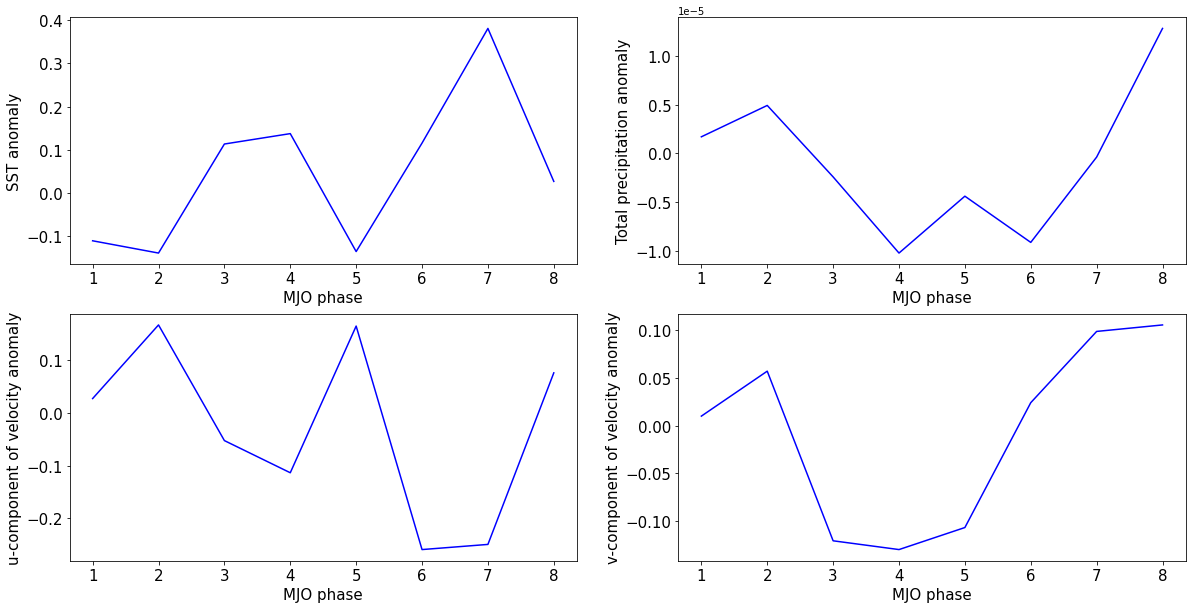

In [414]:
phasegrouping_means = phasegrouping.groupby("phase").mean()
phasegrouping_means.index

plt.rcParams["figure.figsize"] = (20,10)

plt.subplot(2, 2, 1)
plt.plot(phasegrouping_means.index, phasegrouping_means['mean_sst'], c='blue')
# plt.plot(phasegrouping_means.index, mean_chlorophyll_conc, c='green')
plt.xlabel('MJO phase',fontsize=15); plt.ylabel('SST anomaly',fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
# plt.fill_between(phasegrouping_means.index, np.asarray(phasegrouping_means['mean_sst']) - np.asarray(phasegroupingstd['mean_sst']), np.asarray(phasegrouping_means['mean_sst']) + np.asarray(phasegroupingstd['mean_sst']),color = 'blue', alpha = 0.1,zorder = 30)

plt.subplot(2, 2, 2)
plt.plot(phasegrouping_means.index, phasegrouping_means['mean_tp'], c='blue')
plt.xlabel('MJO phase',fontsize=15); plt.ylabel('Total precipitation anomaly',fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
# plt.fill_between(phasegrouping_means.index, np.asarray(phasegrouping_means['mean_tp']) - np.asarray(phasegroupingstd['mean_tp']), np.asarray(phasegrouping_means['mean_tp']) + np.asarray(phasegroupingstd['mean_tp']),color = 'blue', alpha = 0.1,zorder = 30)

plt.subplot(2, 2, 3)
plt.plot(phasegrouping_means.index, phasegrouping_means['mean_u10'], c='blue')
plt.xlabel('MJO phase',fontsize=15); plt.ylabel('u-component of velocity anomaly',fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
# plt.fill_between(phasegrouping_means.index, np.asarray(phasegrouping_means['mean_u10']) - np.asarray(phasegroupingstd['mean_u10']), np.asarray(phasegrouping_means['mean_u10']) + np.asarray(phasegroupingstd['mean_u10']),color = 'blue', alpha = 0.1,zorder = 30)

plt.subplot(2, 2, 4)
plt.plot(phasegrouping_means.index, phasegrouping_means['mean_v10'], c='blue')
plt.xlabel('MJO phase',fontsize=15); plt.ylabel('v-component of velocity anomaly',fontsize=15)
plt.yticks(fontsize=15, rotation=0); plt.xticks(fontsize=15, rotation=0)
# plt.fill_between(phasegrouping_means.index, np.asarray(phasegrouping_means['mean_v10']) - np.asarray(phasegroupingstd['mean_sst']), np.asarray(phasegrouping_means['mean_v10']) + np.asarray(phasegroupingstd['mean_v10']),color = 'blue', alpha = 0.1,zorder = 30)

plt.show()

In [411]:
phasegroupingstd = phasegrouping.groupby("phase").std()

In [412]:
mean_chlorophyll_conc = [37851.99318957, 38146.74980469, 38653.84390311, 38074.13768619, 37894.78904179, 38710.52072572, 35893.45352498, 38710.47899977]

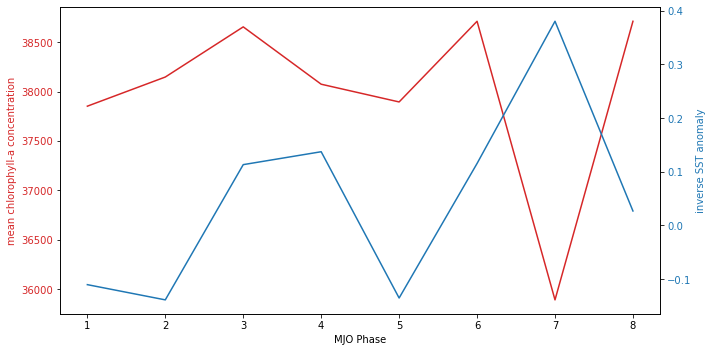

In [425]:
t = phasegrouping_means.index
data1 = mean_chlorophyll_conc
data2 = phasegrouping_means['mean_sst']

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:red'
ax1.set_xlabel('MJO Phase')
ax1.set_ylabel('mean chlorophyll-a concentration', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('inverse SST anomaly', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [424]:
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.526


In [434]:
just_summer_times

,level_0,index,year,month,day,phase,amplitude
0,151,13149,2010,6,1,1,1.435723
1,152,13150,2010,6,2,1,1.051954
2,153,13151,2010,6,3,1,0.898930
3,154,13152,2010,6,4,1,0.907644
4,155,13153,2010,6,5,2,0.880114
...,...,...,...,...,...,...,...
1007,3891,16889,2020,8,27,1,2.380026
1008,3892,16890,2020,8,28,2,1.912718
1009,3893,16891,2020,8,29,2,1.670691
1010,3894,16892,2020,8,30,2,1.570872


In [505]:
# we will use anomalies_u10, anomalies_v10, anomalies_tp, and anomalies_sst
phase_1 = []; phase_2 = []; phase_3 = []; phase_4 = []
phase_5 = []; phase_6 = []; phase_7 = []; phase_8 = []

phase_1_tp = []; phase_2_tp = []; phase_3_tp = []; phase_4_tp = []
phase_5_tp = []; phase_6_tp = []; phase_7_tp = []; phase_8_tp = []

for i in range(len(just_summer_times['phase'])):
    if just_summer_times['phase'][i] == 1:
        phase_1.append(anomalies_sst[i,:,:])
        phase_1_tp.append(anomalies_tp[i,:,:])
    if just_summer_times['phase'][i] == 2:
        phase_2.append(anomalies_sst[i,:,:])
        phase_2_tp.append(anomalies_tp[i,:,:])
    if just_summer_times['phase'][i] == 3:
        phase_3.append(anomalies_sst[i,:,:])
        phase_3_tp.append(anomalies_tp[i,:,:])
    if just_summer_times['phase'][i] == 4:
        phase_4.append(anomalies_sst[i,:,:])
        phase_4_tp.append(anomalies_tp[i,:,:])
    if just_summer_times['phase'][i] == 5:
        phase_5.append(anomalies_sst[i,:,:])
        phase_5_tp.append(anomalies_tp[i,:,:])
    if just_summer_times['phase'][i] == 6:
        phase_6.append(anomalies_sst[i,:,:])
        phase_6_tp.append(anomalies_tp[i,:,:])
    if just_summer_times['phase'][i] == 7:
        phase_7.append(anomalies_sst[i,:,:])
        phase_7_tp.append(anomalies_tp[i,:,:])
    if just_summer_times['phase'][i] == 8:
        phase_8.append(anomalies_sst[i,:,:])
        phase_8_tp.append(anomalies_tp[i,:,:])


In [484]:
phase1_mean_plot = np.asarray(phase_1).mean(axis=0)
phase2_mean_plot = np.asarray(phase_2).mean(axis=0)
phase3_mean_plot = np.asarray(phase_3).mean(axis=0)
phase4_mean_plot = np.asarray(phase_4).mean(axis=0)
phase5_mean_plot = np.asarray(phase_5).mean(axis=0)
phase6_mean_plot = np.asarray(phase_6).mean(axis=0)
phase7_mean_plot = np.asarray(phase_7).mean(axis=0)
phase8_mean_plot = np.asarray(phase_8).mean(axis=0)

In [506]:
phase1_mean_plot_tp = np.asarray(phase_1_tp).mean(axis=0)
phase2_mean_plot_tp = np.asarray(phase_2_tp).mean(axis=0)
phase3_mean_plot_tp = np.asarray(phase_3_tp).mean(axis=0)
phase4_mean_plot_tp = np.asarray(phase_4_tp).mean(axis=0)
phase5_mean_plot_tp = np.asarray(phase_5_tp).mean(axis=0)
phase6_mean_plot_tp = np.asarray(phase_6_tp).mean(axis=0)
phase7_mean_plot_tp = np.asarray(phase_7_tp).mean(axis=0)
phase8_mean_plot_tp = np.asarray(phase_8_tp).mean(axis=0)

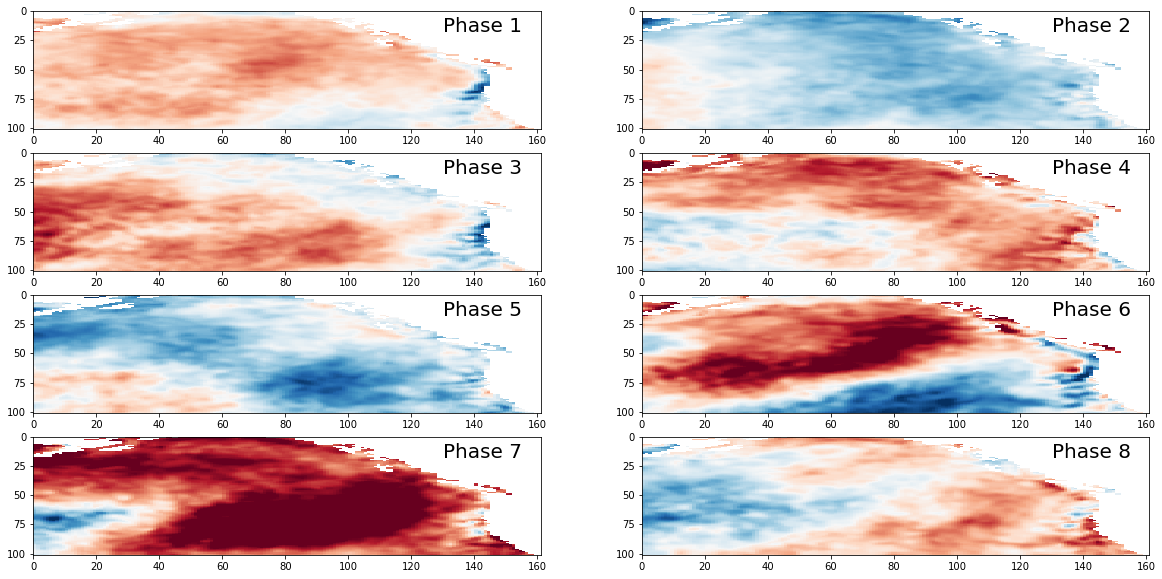

In [503]:
plt.rcParams["figure.figsize"] = (20,10)

plt.subplot(4, 2, 1)
plt.pcolormesh(phase1_mean_plot,cmap='RdBu',vmin=-0.5, vmax=0.5)
plt.text(130, 18, 'Phase 1',fontsize=20)
plt.gca().invert_yaxis()

plt.subplot(4, 2, 2)
plt.pcolormesh(phase2_mean_plot,cmap='RdBu_r',vmin=-0.5, vmax=0.5)
plt.text(130, 18, 'Phase 2',fontsize=20)
plt.gca().invert_yaxis()

plt.subplot(4, 2, 3)
plt.pcolormesh(phase3_mean_plot,cmap='RdBu_r',vmin=-0.5, vmax=0.5)
plt.text(130, 18, 'Phase 3',fontsize=20)
plt.gca().invert_yaxis()

plt.subplot(4, 2, 4)
plt.pcolormesh(phase4_mean_plot,cmap='RdBu_r',vmin=-0.5, vmax=0.5)
plt.text(130, 18, 'Phase 4',fontsize=20)
plt.gca().invert_yaxis()

plt.subplot(4, 2, 5)
plt.pcolormesh(phase5_mean_plot,cmap='RdBu_r',vmin=-0.5, vmax=0.5)
plt.text(130, 18, 'Phase 5',fontsize=20)
plt.gca().invert_yaxis()

plt.subplot(4, 2, 6)
plt.pcolormesh(phase6_mean_plot,cmap='RdBu_r',vmin=-0.5, vmax=0.5)
plt.text(130, 18, 'Phase 6',fontsize=20)
plt.gca().invert_yaxis()

plt.subplot(4, 2, 7)
plt.pcolormesh(phase7_mean_plot,cmap='RdBu_r',vmin=-0.5, vmax=0.5)
plt.text(130, 18, 'Phase 7',fontsize=20)
plt.gca().invert_yaxis()

plt.subplot(4, 2, 8)
plt.pcolormesh(phase8_mean_plot,cmap='RdBu_r',vmin=-0.5, vmax=0.5)
plt.text(130, 18, 'Phase 8',fontsize=20)
plt.gca().invert_yaxis()

#.colorbar()
plt.show()

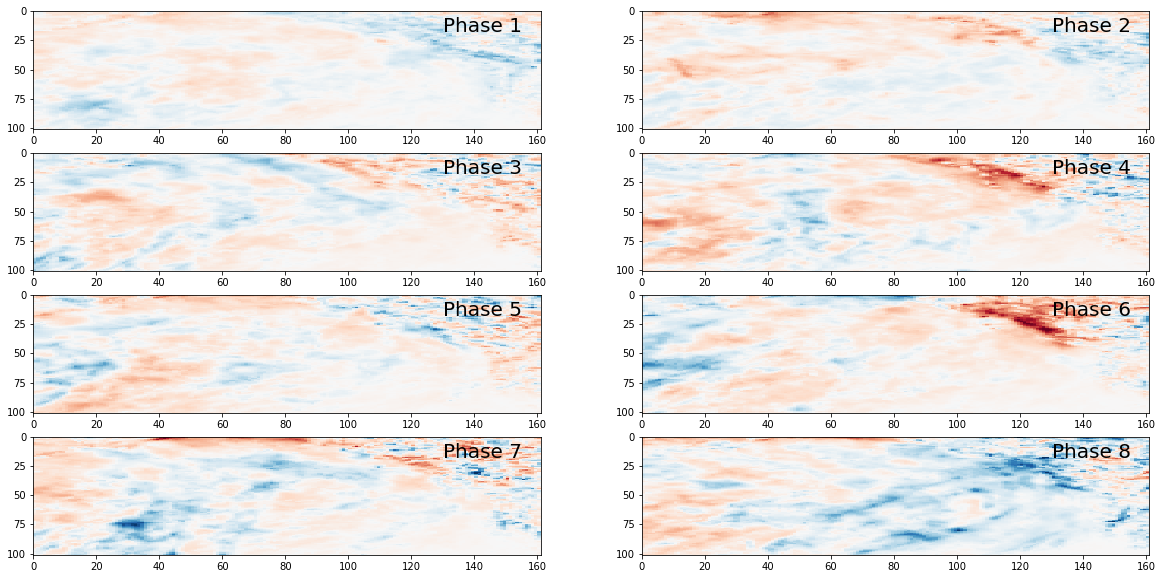

In [526]:
plt.rcParams["figure.figsize"] = (20,10)

plt.subplot(4, 2, 1)
plt.pcolormesh(phase1_mean_plot_tp,cmap='RdBu',vmin=-0.0002, vmax=0.0002)
plt.text(130, 18, 'Phase 1',fontsize=20)
plt.gca().invert_yaxis()

plt.subplot(4, 2, 2)
plt.pcolormesh(phase2_mean_plot_tp,cmap='RdBu_r',vmin=-0.0002, vmax=0.0002)
plt.text(130, 18, 'Phase 2',fontsize=20)
plt.gca().invert_yaxis()

plt.subplot(4, 2, 3)
plt.pcolormesh(phase3_mean_plot_tp,cmap='RdBu',vmin=-0.0002, vmax=0.0002)
plt.text(130, 18, 'Phase 3',fontsize=20)
plt.gca().invert_yaxis()

plt.subplot(4, 2, 4)
plt.pcolormesh(phase4_mean_plot_tp,cmap='RdBu',vmin=-0.0002, vmax=0.0002)
plt.text(130, 18, 'Phase 4',fontsize=20)
plt.gca().invert_yaxis()

plt.subplot(4, 2, 5)
plt.pcolormesh(phase5_mean_plot_tp,cmap='RdBu',vmin=-0.0002, vmax=0.0002)
plt.text(130, 18, 'Phase 5',fontsize=20)
plt.gca().invert_yaxis()

plt.subplot(4, 2, 6)
plt.pcolormesh(phase6_mean_plot_tp,cmap='RdBu',vmin=-0.0002, vmax=0.0002)
plt.text(130, 18, 'Phase 6',fontsize=20)
plt.gca().invert_yaxis()

plt.subplot(4, 2, 7)
plt.pcolormesh(phase7_mean_plot_tp,cmap='RdBu',vmin=-0.0002, vmax=0.0002)
plt.text(130, 18, 'Phase 7',fontsize=20)
plt.gca().invert_yaxis()

plt.subplot(4, 2, 8)
plt.pcolormesh(phase8_mean_plot_tp,cmap='RdBu',vmin=-0.0002, vmax=0.0002)
plt.text(130, 18, 'Phase 8',fontsize=20)
plt.gca().invert_yaxis()

plt.show()

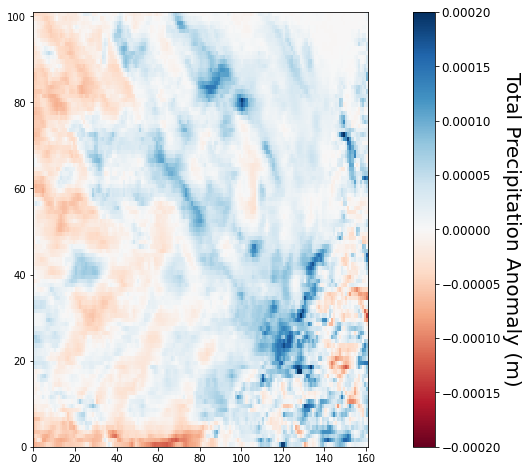

In [571]:
plt.rcParams["figure.figsize"] = (8,8)

plt.pcolormesh(phase8_mean_plot_tp,cmap='RdBu',vmin=-0.0002, vmax=0.0002)
cbar = plt.colorbar(pad=0.1)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(12)
cbar.set_label('Total Precipitation Anomaly (m)',fontsize=20, rotation=270, labelpad=20)
plt.show()

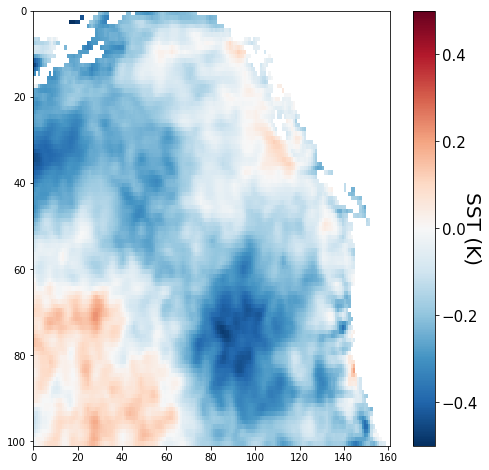

In [555]:
plt.rcParams["figure.figsize"] = (8,8)

cbar=plt.pcolormesh(phase5_mean_plot,cmap='RdBu_r',vmin=-0.5, vmax=0.5)
plt.gca().invert_yaxis()
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
    t.set_fontsize(15)
cbar.set_label('SST (K)',fontsize=20, rotation=270)
plt.show()